# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [2]:
%matplotlib notebook

import logging
from datetime import datetime 

import requests

from matplotlib import pyplot as plt
import pandas as pd
from json import loads, dumps

logging.basicConfig(level=logging.INFO)
plt.style.use('seaborn-darkgrid')


### ECDC

In [3]:

def ecdc():
    response = requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/json')    
    json = response.json()
    df = pd.read_json(dumps(json['records']))   
    df['dateRep']=pd.to_datetime(df['dateRep'].astype(str), format='%d/%m/%Y')

    return df


df_ecdc = ecdc()
logging.info(df_ecdc.columns)

INFO:root:Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


### Austria

In [4]:
def at():
    df = pd.read_csv('https://info.gesundheitsministerium.at/data/Epikurve.csv', delimiter=';')
    weekday= []
    for i, row in df.iterrows():
        day_num = datetime.strptime(row['time'], '%d.%m.%Y').weekday()
        weekday.append(day_num)
        
    df['weekday'] = weekday
    df['time']=pd.to_datetime(df['time'].astype(str), format='%d.%m.%Y')

    return df

df_at = at()
logging.info(df_at.columns);

INFO:root:Index(['time', 'tägliche Erkrankungen', 'Timestamp', 'weekday'], dtype='object')


## Comparison - number of cases

<IPython.core.display.Javascript object>


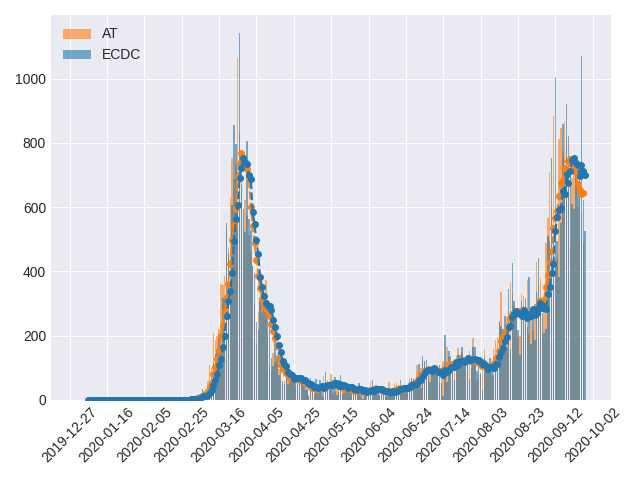

In [10]:
f,ax = plt.subplots()
# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax.plot(df_at.time, df_at['tägliche Erkrankungen'].rolling(7).mean(),  marker='o', markersize=4, linestyle='--', color='C1')

ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='AT',  alpha=0.6, color='C1')
selection = df_ecdc[df_ecdc.geoId=='AT'].sort_values(by=['year','month','day'], ascending=True)
ax.bar(selection.dateRep, selection['cases'],label='ECDC',  alpha=0.6, color='C0')
ax.plot(selection.dateRep, selection['cases'].rolling(7).mean(), marker='o', markersize=4, linestyle='--',color='C0')
# plt.yscale('log')

ax.xaxis.set_major_locator(plt.MaxNLocator(20));

plt.xticks(rotation=45);
plt.legend(loc='best')
plt.tight_layout()



In [7]:
df_at['tägliche Erkrankungen'].sum(), df_ecdc[df_ecdc.geoId=='AT'].cases.sum()

(43452, 43466)

In [9]:
df_at.agg(
        {'tägliche Erkrankungen': ['sum',   'max' ],
        'time': ['min', 'max']} )
    

,tägliche Erkrankungen,time
max,1065.0,2020-09-27
min,NaN,2020-02-25
sum,43452.0,NaT
